## EDA- Regresión

### 1. Importamos las librerías necesarias.

In [55]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings('ignore')

### 2. Abrimos el archivo con el que vamos a trabajar.

In [56]:
df= pd.read_csv('../archivos/bikes_limpio.csv', index_col=0)
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,82,1518,1600,viernes


### 3. Empezamos la exploración de nuestra base de datos limpia, para empezar a preparar nuestro algoritmo predictivo.

In [57]:
df.shape

(730, 15)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 730 non-null    object 
 1   estacion              730 non-null    object 
 2   año                   730 non-null    int64  
 3   mes                   730 non-null    int64  
 4   dias_festivos         730 non-null    object 
 5   dias_laborales        730 non-null    int64  
 6   clima                 730 non-null    object 
 7   temperatura           730 non-null    float64
 8   sensacion_termica     730 non-null    float64
 9   humedad               730 non-null    float64
 10  velocidad_viento      730 non-null    float64
 11  clientes_casuales     730 non-null    int64  
 12  clientes_registrados  730 non-null    int64  
 13  total_bicis           730 non-null    int64  
 14  dia_semana            730 non-null    object 
dtypes: float64(4), int64(6)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
año,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mes,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
dias_laborales,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temperatura,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
sensacion_termica,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
humedad,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
velocidad_viento,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
clientes_casuales,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
clientes_registrados,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
total_bicis,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [60]:
df.describe(include='object').T

,count,unique,top,freq
fecha,730,730,2018-01-01,1
estacion,730,4,verano,188
dias_festivos,730,12,No Festivo,709
clima,730,3,Soleado,463
dia_semana,730,7,lunes,105


In [61]:
df.stb.missing()

,missing,total,percent
fecha,0,730,0.0
estacion,0,730,0.0
año,0,730,0.0
mes,0,730,0.0
dias_festivos,0,730,0.0
dias_laborales,0,730,0.0
clima,0,730,0.0
temperatura,0,730,0.0
sensacion_termica,0,730,0.0
humedad,0,730,0.0


3.1 Comprobamos la correlación entre todas nuestras variables.

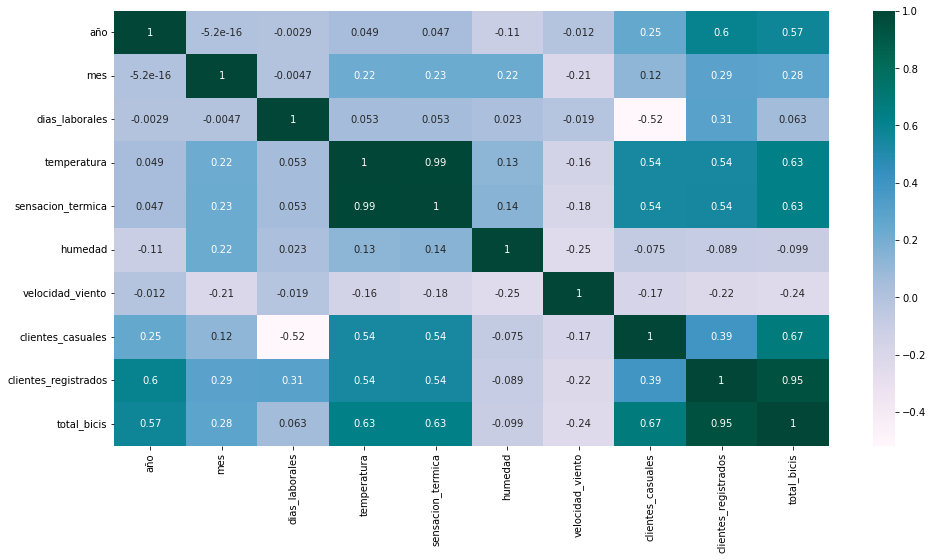

In [62]:
sns.heatmap(df.corr(), cmap= 'PuBuGn', annot= True);

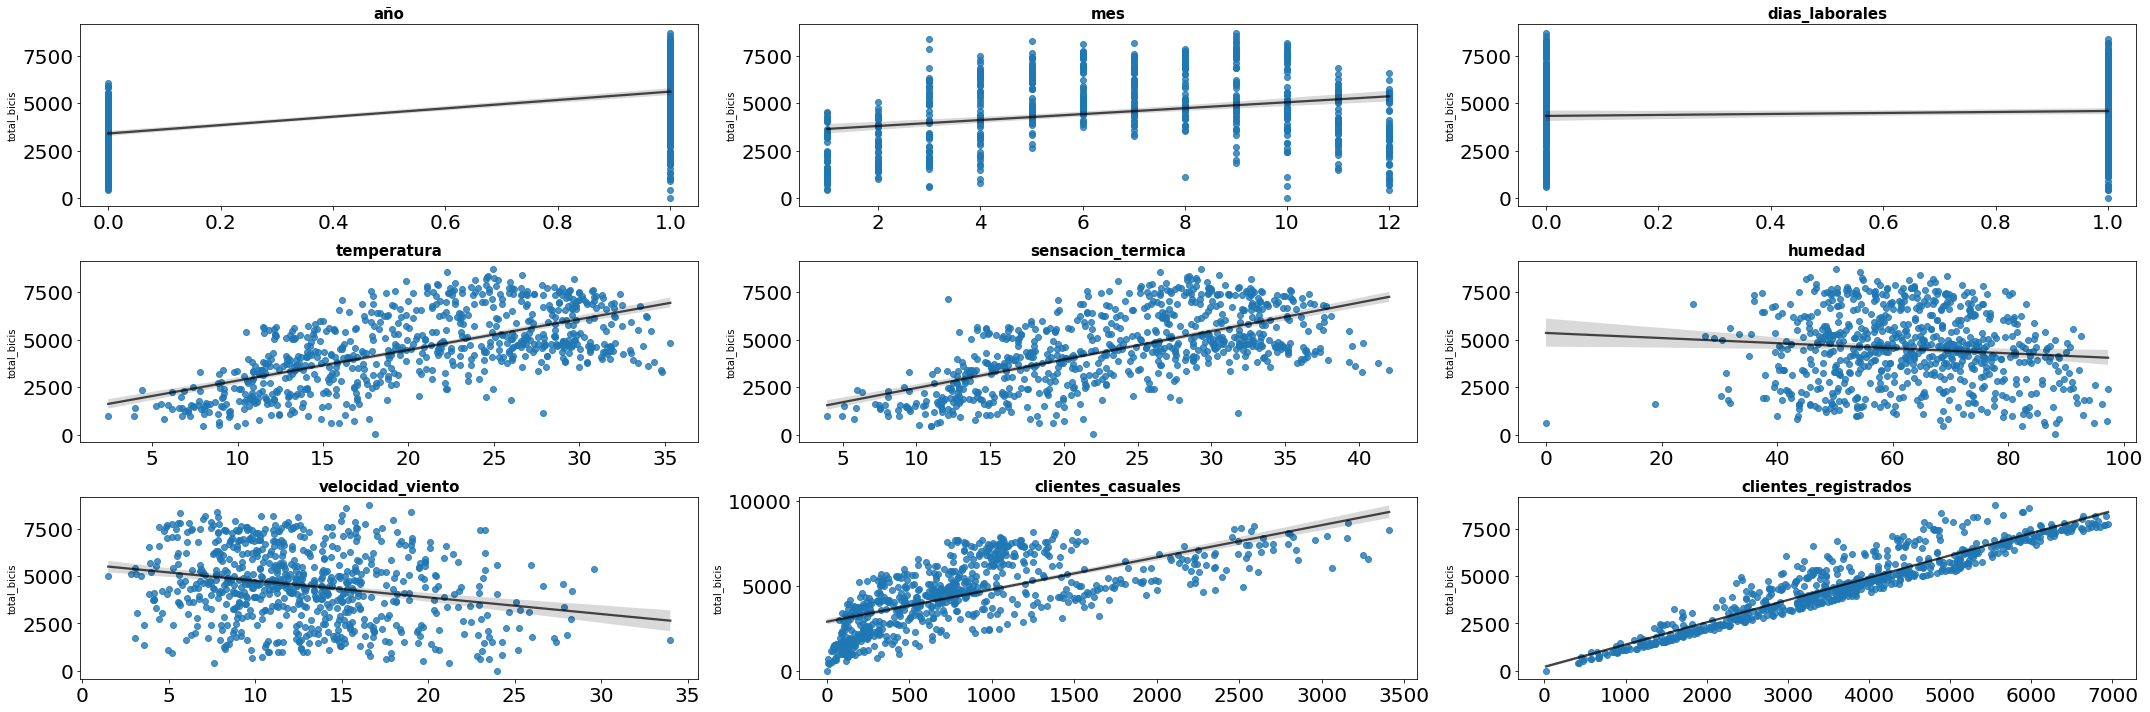

In [70]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('total_bicis', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'total_bicis',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

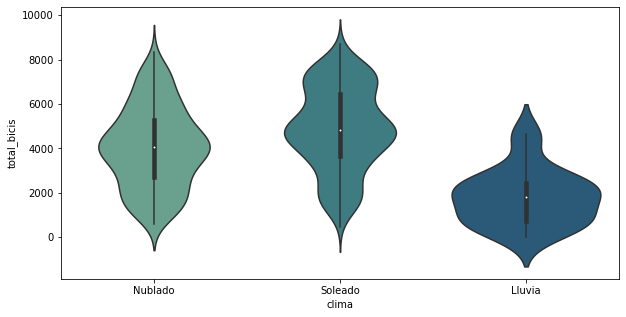

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'clima',
    y       = 'total_bicis',
    data    = df,
    palette = 'crest',
    ax      = ax
);

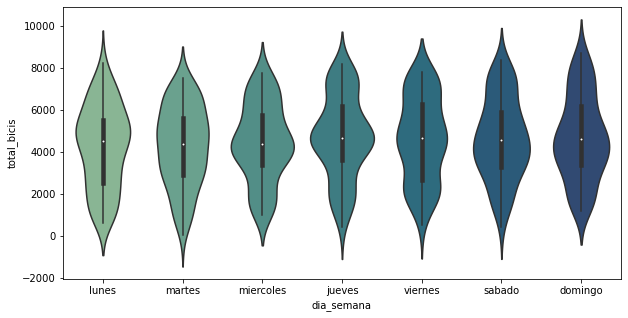

In [75]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'dia_semana',
    y       = 'total_bicis',
    data    = df,
    palette = 'crest',
    ax      = ax
);

In [63]:
#df.drop(["dias_laborables", "temperatura", "humedad", "velocidad_viento"])

3.2 Comprobamos la normalidad de nuestra variable respuesta.

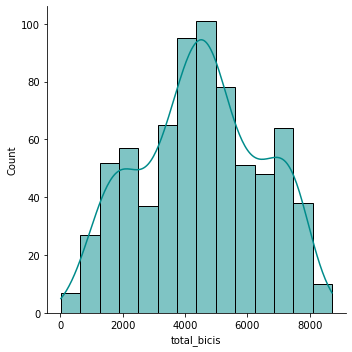

In [64]:
sns.displot(df['total_bicis'], kde = True, color = "darkcyan");

In [65]:
stats.shapiro(df['total_bicis'])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

3.3. Realizamos un Anova.

In [66]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'dias_festivos', 'dias_laborales',
       'clima', 'temperatura', 'sensacion_termica', 'humedad',
       'velocidad_viento', 'clientes_casuales', 'clientes_registrados',
       'total_bicis', 'dia_semana'],
      dtype='object')

In [67]:
lm = ols('total_bicis ~ año + mes + dias_festivos + dias_laborales + clima + temperatura + sensacion_termica + humedad + velocidad_viento + clientes_casuales + clientes_registrados + dia_semana',  data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
dias_festivos,11.0,8.974037e+07,8.158215e+06,7.711633e+28,0.0
clima,2.0,2.599449e+08,1.299724e+08,1.228577e+30,0.0
dia_semana,6.0,2.019942e+07,3.366571e+06,3.182284e+28,0.0
año,1.0,8.275131e+08,8.275131e+08,7.822149e+30,0.0
mes,1.0,2.325304e+08,2.325304e+08,2.198016e+30,0.0
dias_laborales,1.0,2.292047e+06,2.292047e+06,2.166580e+28,0.0
temperatura,1.0,6.823760e+08,6.823760e+08,6.450226e+30,0.0
sensacion_termica,1.0,8.767677e+06,8.767677e+06,8.287732e+28,0.0
humedad,1.0,2.684779e+06,2.684779e+06,2.537813e+28,0.0
velocidad_viento,1.0,2.458340e+07,2.458340e+07,2.323770e+29,0.0


In [68]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_bicis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.224e+29
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:19:23   Log-Likelihood:                 17448.
No. Observations:                 730   AIC:                        -3.484e+04
Df Residuals:                     701   BIC:                        -3.471e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -3.183e-12   8.92e-12     -0.357      0.721   -2.07e-11    1.43e-11
dias_festivos[T.Columbus Day]               -2.228e-11   1.05e-11     -2.112      0.035    -4.3e-11   -1.57e-12
dias_festivos[T.Independence Day]           -1.273e-11   1.05e-11     -1.209      0.227   -3.34e-11    7.95e-12
dias_festivos[T.Labor Day]                  -9.095e-12   1.05e-11     -0.865      0.387   -2.97e-11    1.15e-11
dias_festivos[T.Martin Luther King Jr. Day]  1.376e-11   1.06e-11      1.301      0.194      -7e-12    3.45e-11
dias_festivos[T.Memorial Day]                1.546e-11   1.06e-11      1.456      0.146   -5.39e-12    3.63e-11
dias_festivos[T.New Year's Day]              1.828e-10   1.05e-11     17.470      0.000    1.62e-10    2.03e-10
dias_festivos[T.No Festivo]                 -9.095e-13   7.52e-12     -0.121      0.904   -1.57e-11    1.38e-11
dias_festivos[T.Thanksgiving]               -5.002e-12   1.05e-11     -0.475      0.635   -2.57e-11    1.57e-11
dias_festivos[T.Veterans Day]               -1.819e-11   1.05e-11     -1.735      0.083   -3.88e-11     2.4e-12
dias_festivos[T.Veterans Day (Observed)]      5.23e-12   1.28e-11      0.408      0.683   -1.99e-11    3.04e-11
dias_festivos[T.Washington's Birthday]      -2.456e-11   1.06e-11     -2.319      0.021   -4.53e-11   -3.77e-12
clima[T.Nublado]                             -7.39e-13   2.57e-12     -0.288      0.774   -5.78e-12     4.3e-12
clima[T.Soleado]                             7.958e-13   2.77e-12      0.287      0.774   -4.64e-12    6.24e-12
dia_semana[T.jueves]                         2.018e-12    1.6e-12      1.260      0.208   -1.13e-12    5.16e-12
dia_semana[T.lunes]                          5.116e-13   1.67e-12      0.307      0.759   -2.77e-12    3.79e-12
dia_semana[T.martes]                         2.132e-13    1.5e-12      0.142      0.887   -2.73e-12    3.16e-12
dia_semana[T.miercoles]                      3.283e-12   1.55e-12      2.122      0.034    2.45e-13    6.32e-12
dia_semana[T.sabado]                         2.274e-12   1.55e-12      1.463      0.144   -7.78e-13    5.33e-12
dia_semana[T.viernes]                        2.188e-12   1.59e-12      1.380      0.168   -9.24e-13     5.3e-12
año                                          4.547e-13   1.23e-12      0.371      0.711   -1.95e-12    2.86e-12
mes                                          2.132e-14   1.32e-13      0.161      0.872   -2.39e-13    2.81e-13
dias_laborales                              -3.226e-12   1.77e-12     -1.827      0.068   -6.69e-12     2.4e-13
temperatura                                   1.99e-13   4.07e-13      0.489      0.625      -6e-13    9.98e-13
sensacion_termica                            -1.35e-13   3.